# Importing Library

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns",None)

C:\Users\sumit\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Dataset

In [2]:
df = pd.read_csv(r'E:\Data Science\Oasis Infobyte Project And Dataset\Housing.csv')

#  Data Cleaning and Preprocessing -: Performing EDA

In [3]:
# getting first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# getting last 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
# getting rows and columns 
df.shape

(545, 13)

In [6]:
# checking 5 point summury
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [7]:
# checking categorical and numerical data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# getting only data types 
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
# checking for missing data 
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
# is there any duplicated value 
df.duplicated().sum()

0

# Checking For Outlier 

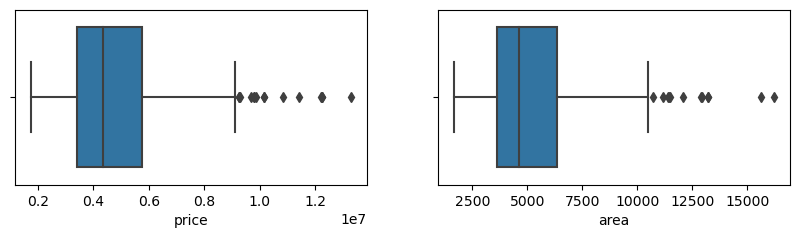

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(df["price"])

plt.subplot(2,2,2)
sns.boxplot(df["area"])
plt.show()

###### Yes we have a outliers 

###### We can remove this Outlier as we have sufficient data to analyze  , it will not affect to our data 

In [12]:
df['price'] = df['price'].clip(lower = df['price'].quantile(.15), upper = df['price'].quantile(.85))
df['area'] = df['area'].clip(lower = df['area'].quantile(.15), upper = df['area'].quantile(.85))

# Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<Figure size 1000x1000 with 0 Axes>

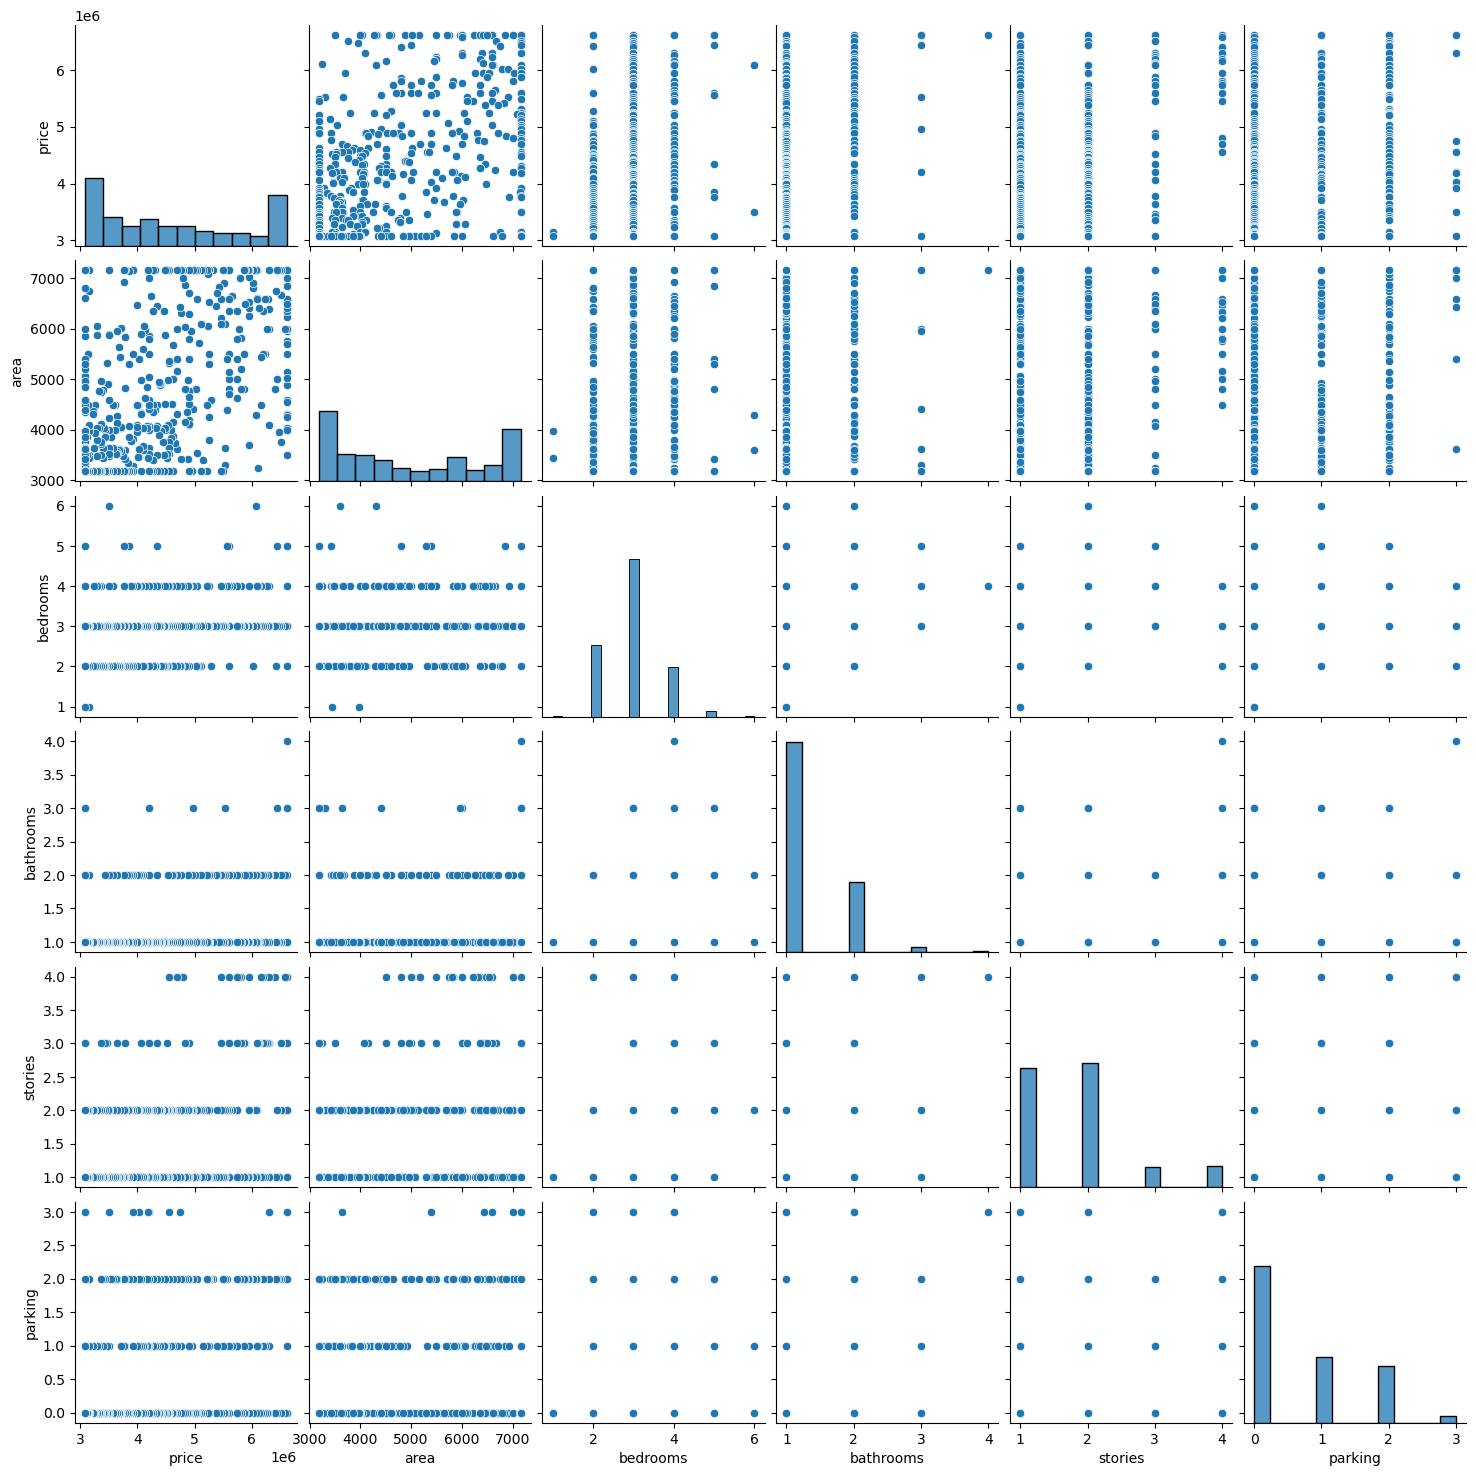

In [13]:
plt.figure(figsize = (10,10))
sns.pairplot(df)
plt.show()

# Data Transformation:

In [14]:
# getting all columns name 
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
# getting dependent veriable to last column
data = df.reindex(columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus','price'])

In [16]:
# now our dependent veriable in last 
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7157.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,6615000.0
1,7157.0,4,4,4,yes,no,no,no,yes,3,no,furnished,6615000.0
2,7157.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,6615000.0
3,7157.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6615000.0
4,7157.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished,6615000.0


In [17]:
# after getting dependent veriable to the last,  all columns name 
data.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

# Performing One Hot Encoding

###### We can replace the value by replace function but we will do it by One Hot Encoding 

In [18]:
# importing library 
from sklearn.preprocessing import OneHotEncoder

In [19]:
onehot = OneHotEncoder()

In [20]:
# getting a categorical data to convert into numeric 
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']

In [21]:
encoded_data = onehot.fit_transform(data[cat_var])
encoded_data

<545x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3815 stored elements in Compressed Sparse Row format>

In [22]:
# convderting a Compressed Sparse Row format into dataframe
encoded_df = pd.DataFrame(encoded_data.toarray(),columns = onehot.get_feature_names(cat_var))

In [23]:
# merging original data and new dataframe in on data 
housing_encoded_d = pd.concat([data,encoded_df],axis=1)

In [24]:
housing_encoded_d.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7157.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,6615000.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,7157.0,4,4,4,yes,no,no,no,yes,3,no,furnished,6615000.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,7157.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,6615000.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7157.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6615000.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7157.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished,6615000.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [25]:
# droping unwanted columns which doesn't make any sense after encoding 
housing_data = housing_encoded_d.drop(['mainroad','mainroad_no', 'guestroom','guestroom_no','basement','basement_no', 'hotwaterheating','hotwaterheating_no', 'airconditioning','airconditioning_no', 'prefarea','prefarea_no','furnishingstatus'],axis= 1)

In [26]:
housing_data.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [27]:
# getting dependent veriable to last column by indexing 
housing_data = housing_encoded_d.reindex(columns=['area', 'bedrooms', 'bathrooms', 'stories','mainroad_yes', 'guestroom_yes',
       'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes',
       'prefarea_yes', 'parking','furnishingstatus_furnished',
       'furnishingstatus_semi-furnished','furnishingstatus_unfurnished','price'])

In [28]:
housing_data.head()

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,7157.0,4,2,3,1.0,0.0,0.0,0.0,1.0,1.0,2,1.0,0.0,0.0,6615000.0
1,7157.0,4,4,4,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,6615000.0
2,7157.0,3,2,2,1.0,0.0,1.0,0.0,0.0,1.0,2,0.0,1.0,0.0,6615000.0
3,7157.0,4,2,2,1.0,0.0,1.0,0.0,1.0,1.0,3,1.0,0.0,0.0,6615000.0
4,7157.0,4,1,2,1.0,1.0,1.0,0.0,1.0,0.0,2,1.0,0.0,0.0,6615000.0


In [29]:
housing_data.shape

(545, 15)

In [30]:
housing_data.isnull().sum()

area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
parking                            0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
price                              0
dtype: int64

In [31]:
# checking for duplicate 
housing_data.duplicated().sum()

8

In [32]:
# Removing duplicates
housing_data.drop_duplicates(inplace=True)

In [33]:
housing_data.duplicated().sum()

0

##### Now we don't have duplicate in dataset

# Model Building 

In [34]:
# Independent variable
x = housing_data.iloc[:,:-1]
x

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7157.0,4,2,3,1.0,0.0,0.0,0.0,1.0,1.0,2,1.0,0.0,0.0
1,7157.0,4,4,4,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0
2,7157.0,3,2,2,1.0,0.0,1.0,0.0,0.0,1.0,2,0.0,1.0,0.0
3,7157.0,4,2,2,1.0,0.0,1.0,0.0,1.0,1.0,3,1.0,0.0,0.0
4,7157.0,4,1,2,1.0,1.0,1.0,0.0,1.0,0.0,2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3180.0,2,1,1,1.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0
541,3180.0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
542,3620.0,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0
543,3180.0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0


In [35]:
# dependent variable
y = housing_data.iloc[:,-1]
y

0      6615000.0
1      6615000.0
2      6615000.0
3      6615000.0
4      6615000.0
         ...    
540    3080000.0
541    3080000.0
542    3080000.0
543    3080000.0
544    3080000.0
Name: price, Length: 537, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [37]:
#  checking num of rows and columns
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(429, 14) (108, 14) (429,) (108,)


In [38]:
print(x_train)

       area  bedrooms  bathrooms  stories  mainroad_yes  guestroom_yes  \
132  5200.0         3          1        3           1.0            0.0   
451  6750.0         2          1        1           1.0            0.0   
529  3970.0         3          1        2           1.0            0.0   
474  4352.0         4          1        2           0.0            0.0   
242  3640.0         3          1        2           1.0            0.0   
..      ...       ...        ...      ...           ...            ...   
8    7157.0         4          1        2           1.0            1.0   
73   6600.0         2          2        4           1.0            0.0   
400  3512.0         2          1        1           1.0            0.0   
118  6420.0         3          1        1           1.0            0.0   
206  5800.0         2          1        1           1.0            1.0   

     basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
132           0.0                 

In [39]:
print(x_test)

       area  bedrooms  bathrooms  stories  mainroad_yes  guestroom_yes  \
501  3180.0         3          1        1           0.0            0.0   
524  3264.0         2          1        1           1.0            0.0   
490  4350.0         3          1        2           0.0            0.0   
306  4840.0         3          1        2           1.0            0.0   
470  5076.0         3          1        1           0.0            0.0   
..      ...       ...        ...      ...           ...            ...   
521  3635.0         2          1        1           0.0            0.0   
473  7157.0         2          1        1           1.0            0.0   
342  7152.0         3          1        2           1.0            0.0   
49   7157.0         3          2        1           1.0            1.0   
475  3180.0         2          1        2           1.0            0.0   

     basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
501           0.0                 

In [40]:
print(y_train)

132    5810000.0
451    3150000.0
529    3080000.0
474    3080000.0
242    4550000.0
         ...    
8      6615000.0
73     6615000.0
400    3500000.0
118    5950000.0
206    4900000.0
Name: price, Length: 429, dtype: float64


In [41]:
print(y_test)

501    3080000.0
524    3080000.0
490    3080000.0
306    4165000.0
470    3080000.0
         ...    
521    3080000.0
473    3080000.0
342    3850000.0
49     6615000.0
475    3080000.0
Name: price, Length: 108, dtype: float64


In [42]:
# importing the linear regrassion model
from sklearn.linear_model import LinearRegression

In [43]:
# Initialize and train the linear regression model
model = LinearRegression()

In [44]:
model.fit(x_train, y_train)

LinearRegression()

In [45]:
# Predict using the test set
y_pred = model.predict(x_test)
print(y_pred)

[2655199.75662078 3033746.33998705 4085932.82843218 4231051.68924445
 3162726.70600913 3719775.00858146 3259497.94893304 5284013.72819878
 5558116.98260114 3890927.35779628 3936376.00522621 4300263.48424203
 3142492.27176869 4729940.32573125 3957936.51784911 5366810.58098699
 3717886.60199535 5593352.89549597 3286727.45555777 4037991.61476328
 5076810.19063381 3703787.25591344 3500919.46878877 4340470.07965252
 5066370.98827388 5081027.59415978 5484778.35201088 5833882.86009819
 5046578.35151302 5957630.65898542 4367146.62853724 5604014.52338168
 4150643.54686599 3423147.49047773 3577939.63134039 5090674.07066484
 3311088.94057447 3243997.05941779 5680932.06392791 3243235.59746294
 4177023.01340138 4024711.39198684 5109941.40106538 5039487.94180884
 4343167.70004902 5036410.9601028  4182379.71844654 4053857.44501412
 4058900.2597452  5673933.21541543 5327245.66623765 4302235.32902631
 5458868.39619835 3510941.61040374 6537458.44594779 4844239.90186136
 5989108.32113096 5312054.36672512

# Model Evaluation

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [48]:
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

In [49]:
# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 379017144016.35
R-squared Score: 0.73


# Visualization: Predicted vs Actual Values

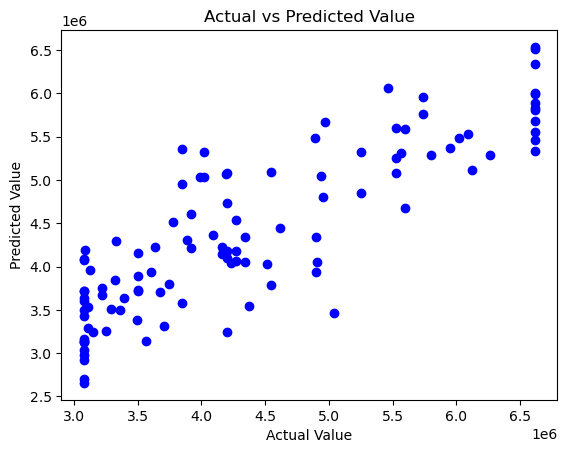

In [50]:
# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value')
plt.show()

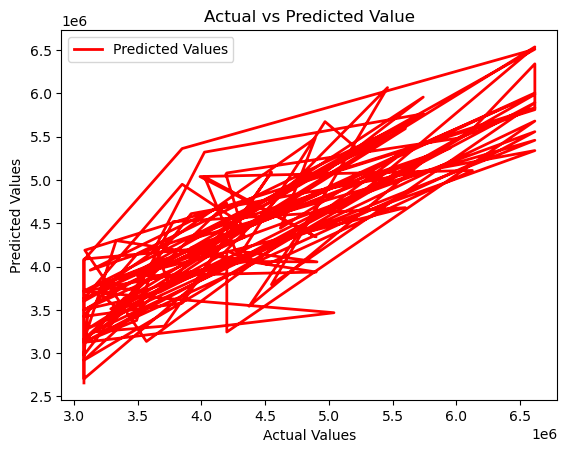

In [51]:
# Plot the actual vs predicted values
# plt.scatter(y_test, y_pred, color='blue', label='Actual Values')
plt.plot(y_test, y_pred, color='red', linewidth=2, label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Value')
plt.legend()
plt.show()